# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [7]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [8]:
# Visit the URL
browser.visit(url)

In [9]:
# Allow time for the page to load
html = browser.html
page_soup = soup(html, 'html.parser')

In [10]:
# Confirm that we have connected by printing the page title
print("Page Title:", page_soup.title.text)

Page Title: Mars Temperature Data


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [11]:
# Create a Beautiful Soup Object
html = browser.html
page_soup = soup(html, 'html.parser')

# Confirm the BeautifulSoup object is created by printing the title of the page
print("Page Title:", page_soup.title.text)

Page Title: Mars Temperature Data


In [12]:
# Extract all rows of data
# Locate the table within the HTML using BeautifulSoup
table = page_soup.find('table', class_='table')  # Adjust class if needed

# Extract the table headers to define column names
headers = [header.text.strip() for header in table.find_all('th')]

# Create an empty list to store rows of data
data = []

# Loop through each row in the table body to extract all rows of data
for row in table.find_all('tr')[1:]:  # Skipping the header row
    # Extract each cell in the row
    cells = row.find_all('td')
    # Store each cell’s text content in a list
    row_data = [cell.text.strip() for cell in cells]
    # Append the row data to the main data list
    data.append(row_data)

# Create a DataFrame from the data
mars_df = pd.DataFrame(data, columns=headers)

# Display the DataFrame to verify
mars_df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [13]:
# Locate the table within the HTML using BeautifulSoup
table = page_soup.find('table', class_='table')

In [14]:
# Extract the table headers to define column names
headers = [header.text.strip() for header in table.find_all('th')]

In [15]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr')[1:]:  # Skipping the header row
    # Extract each cell in the row
    cells = row.find_all('td')
    # Store each cell’s text content in a list
    row_data = [cell.text.strip() for cell in cells]
    # Append the row data to the main data list
    data.append(row_data)

In [16]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data, columns=headers)

In [17]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [18]:
# Examine data type of each column
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [19]:
# Change data types for data analysis
# Convert 'terrestrial_date' to a datetime object
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

#Print the output
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [22]:
# Convert 'sol', 'ls', 'month' columns to integers
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)

#print output
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [23]:
# Convert 'min_temp' and 'pressure' to floats
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

#print output
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [24]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)
print(mars_df.head())

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object
   id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
2  24       2012-08-18   12  156      6     -76.0     741.0
3  35       2012-08-19   13  157      6     -74.0     732.0
4  46       2012-08-20   14  157      6     -74.0     740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [25]:
# 1. How many months are there on Mars?
# Find the number of unique months on Mars
num_mars_months = mars_df['month'].nunique()
print("Number of months on Mars:", num_mars_months)

Number of months on Mars: 12


In [26]:
# 2. How many sols (Martian days) worth of data are there?
# Count the number of unique sols
num_sols = mars_df['sol'].nunique()
print("Number of Martian days (sols) in the dataset:", num_sols)


Number of Martian days (sols) in the dataset: 1867


In [ ]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()


In [30]:
# Print the result
print("Average Minimum Temperature by Month:")
print(avg_min_temp_by_month)

Average Minimum Temperature by Month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


In [31]:
# Sort the result to display coldest to warmest months
avg_min_temp_sorted = avg_min_temp_by_month.sort_values()

In [36]:
# Print the sorted average minimum temperatures by month
print("Average minimum temperature by month (coldest to warmest):\n", avg_min_temp_sorted)

Average minimum temperature by month (coldest to warmest):
 month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64


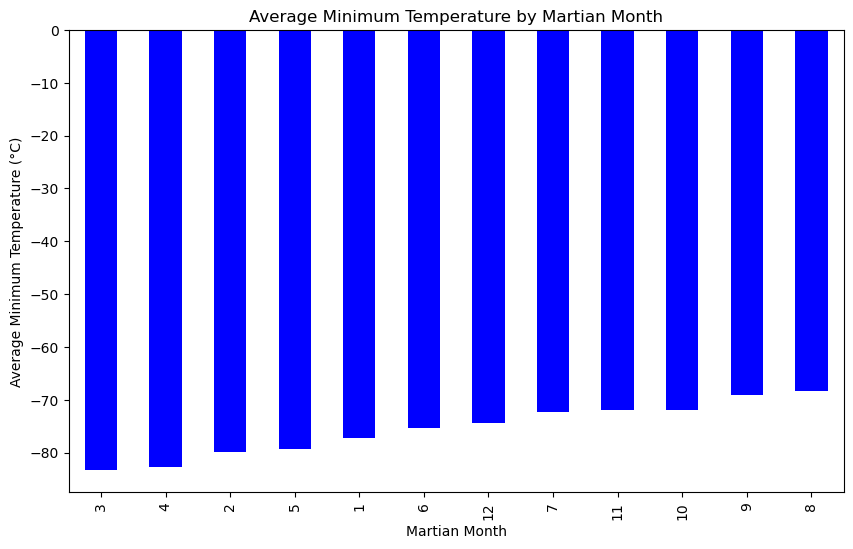

In [37]:
# Plot the average minimum temperature by month
avg_min_temp_sorted.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title("Average Minimum Temperature by Martian Month")
plt.xlabel("Martian Month")
plt.ylabel("Average Minimum Temperature (°C)")
plt.show()

In [38]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
coldest_month = avg_min_temp_sorted.idxmin()
warmest_month = avg_min_temp_sorted.idxmax()

print("Coldest month on Mars:", coldest_month)
print("Warmest month on Mars:", warmest_month)

Coldest month on Mars: 3
Warmest month on Mars: 8


In [39]:
# 4. What is the average pressure by month?
#Calculate the average daily atmospheric pressure for each month
avg_pressure_by_month = mars_df.groupby('month')['pressure'].mean()
avg_pressure_sorted = avg_pressure_by_month.sort_values()
print("Average atmospheric pressure by month (lowest to highest):\n", avg_pressure_sorted)


Average atmospheric pressure by month (lowest to highest):
 month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64


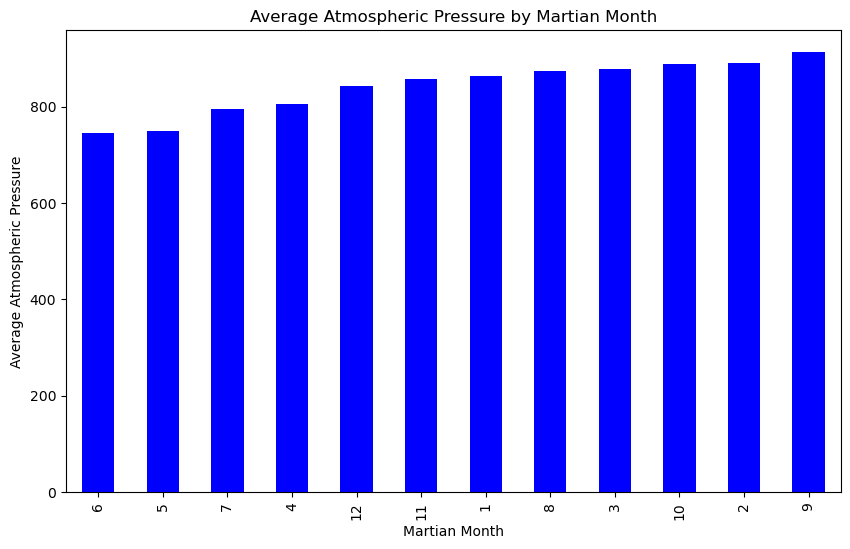

In [40]:
# Plot the average pressure by month
avg_pressure_sorted.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title("Average Atmospheric Pressure by Martian Month")
plt.xlabel("Martian Month")
plt.ylabel("Average Atmospheric Pressure")
plt.show()

In [41]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
lowest_pressure_month = avg_pressure_sorted.idxmin()
highest_pressure_month = avg_pressure_sorted.idxmax()

print("Lowest pressure month on Mars:", lowest_pressure_month)
print("Highest pressure month on Mars:", highest_pressure_month)

Lowest pressure month on Mars: 6
Highest pressure month on Mars: 9


Average minimum temperature by month (coldest to warmest):
 month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64


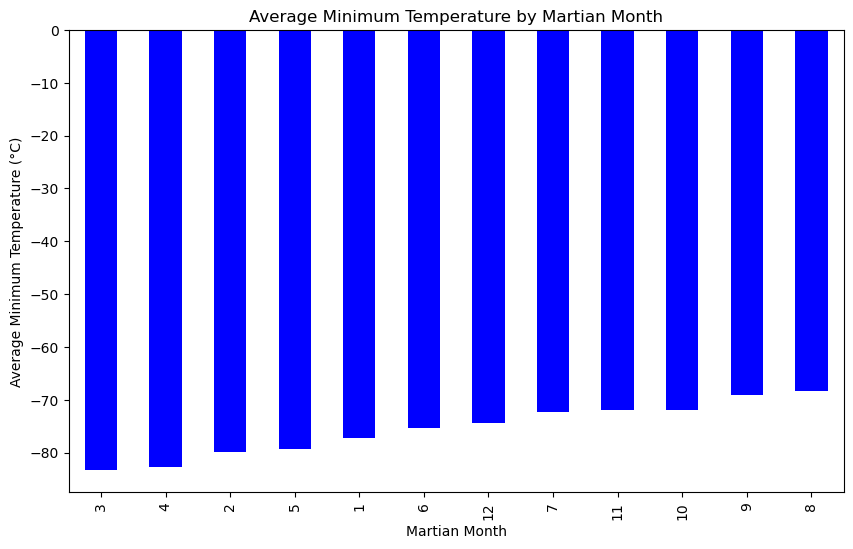

In [42]:
# Calculate the average minimum temperature for each month
avg_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()
avg_min_temp_sorted = avg_min_temp_by_month.sort_values()
print("Average minimum temperature by month (coldest to warmest):\n", avg_min_temp_sorted)

# Plot the average minimum temperature by Martian month
avg_min_temp_sorted.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title("Average Minimum Temperature by Martian Month")
plt.xlabel("Martian Month")
plt.ylabel("Average Minimum Temperature (°C)")
plt.show()

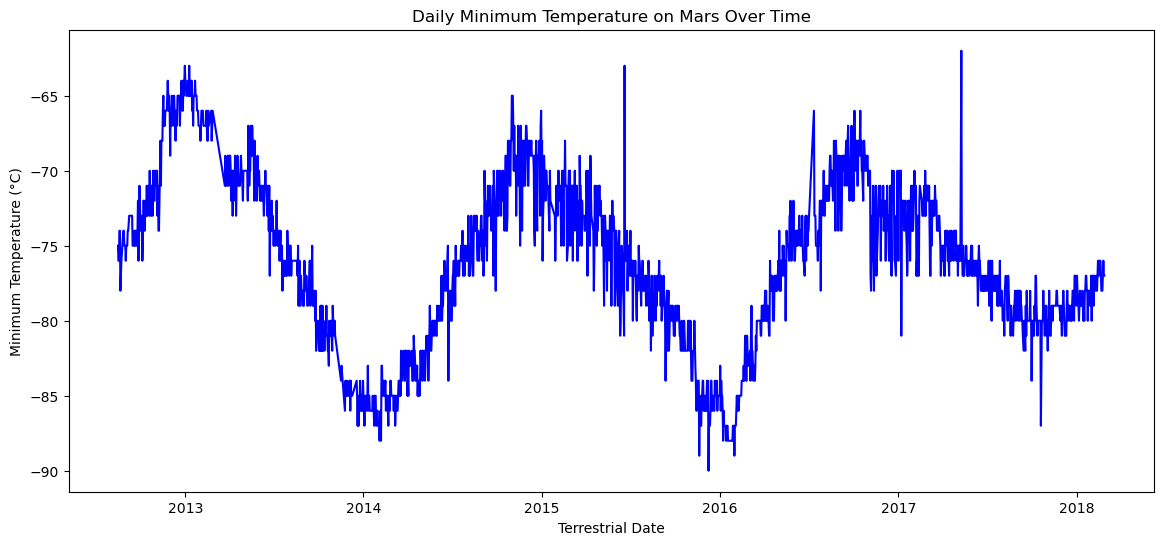

In [43]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Plot the daily minimum temperature by terrestrial date
plt.figure(figsize=(14, 6))
plt.plot(mars_df['terrestrial_date'], mars_df['min_temp'], color='blue')
plt.title("Daily Minimum Temperature on Mars Over Time")
plt.xlabel("Terrestrial Date")
plt.ylabel("Minimum Temperature (°C)")
plt.show()

#### Minimum Temperature

YOUR ANALYSIS HERE

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [44]:
# Write the data to a CSV
mars_df.to_csv('mars_weather_data.csv', index=False)

In [45]:
browser.quit()